# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ORB (جهت سریع و چرخش مختصر)  </div>

### ORB (Oriented FAST and Rotated BRIEF)

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
مهمترین چیز در مورد ORB این است که این الگوریتم توسط  محققان "OpenCV Labs" ابداع شده است.
این الگوریتم که در سال 2011 ارائه شد، جایگزینی کارآمد برای روشهایی نظیر SIFT یا SURF خصوصا از نظر محاسبات و سرعت است.
همچنین این نکته حائز اهمیت است که الگوریتمهای SIFT و SURF ثبت اختراع شدند و برای کار صنعتی در اسکیل بین‌المللی باید هزینه استفاده از آن را پرداخت کنید. اما ORB برای استفاده آزاد است.
</div>

[Feature Detection and Description](https://docs.opencv.org/4.x/db/d27/tutorial_py_table_of_contents_feature2d.html)

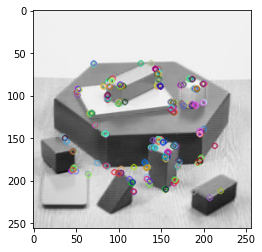

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('images/blox.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)

img=cv2.drawKeypoints(img,kp,img)
plt.imshow(img),plt.show();

(290, 32)


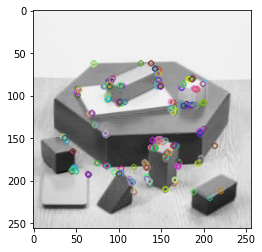

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('images/blox.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp) #it is not used here!
print(des.shape)
img=cv2.drawKeypoints(img,kp,img)
plt.imshow(img),plt.show();

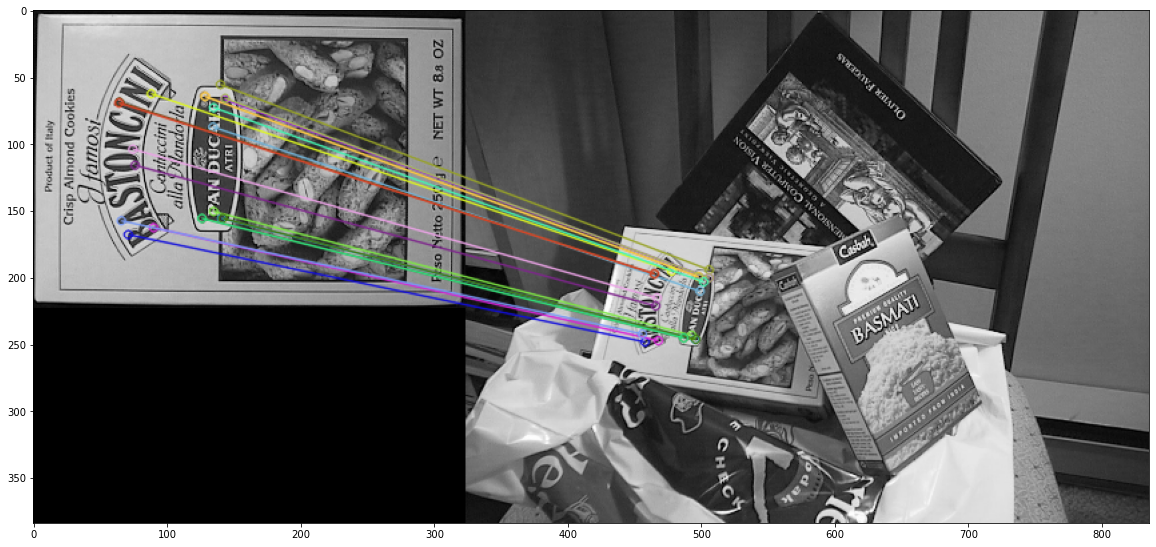


Number of Matching Keypoints Between The Training and Query Images:  453


In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img1 = cv2.imread('images/box.png')
img2 = cv2.imread('images/box_in_scene.png') 

# Initiate SIFT detector
sift = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = False)

# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img_result = cv2.drawMatches(img1,kp1,img2,kp2,matches[:20],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=[20,10])
plt.imshow(img_result[...,::-1]),plt.show();
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

https://docs.opencv.org/4.x/d1/d89/tutorial_py_orb.html